<a href="https://colab.research.google.com/github/tgalbaugh/whProductivityPython/blob/master/whProductivityPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV for export to BigQuery has been created in your directory

Total Transaction Count 3530

Total Earned Hours 234.3
Total Actual Hours 260.4
Performance 90.0 %

Total Gap Hours 47.3

Total Actual Hours 260.4
Total Units 6676
Total Units per Hour 25.6

Largest Unit Transaction 474
Longest Transaction (in hours) 9.5



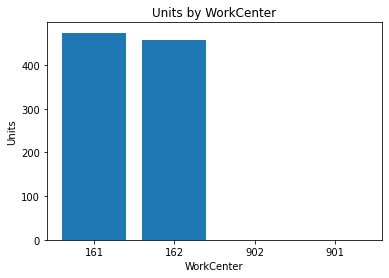

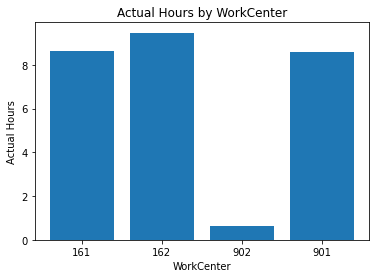

In [114]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz as tz
import matplotlib.pyplot as plt

#load CSV it into pandas
df = pd.read_csv(
'https://raw.githubusercontent.com/tgalbaugh/whProductivityPython/master/sourceCSV/warehousedata-prodsheet-20220101.csv'
#'//content/whProductivityPython/sourceCSV/warehousedata-prodsheet-20220101.csv'
,encoding = "ISO-8859-1"
,usecols=[0,1,2,3,4,5,7,8,9,10,17,18,19,20,23,25,27,29,31,33,35,37,55,82]
,names = ['SystemID', 'Date', 'Associate','WorkCenter','Activity','Allocation','Units','ActualHours','EarnedHours','StopTime','AssociateName','WorkCenterDesc','ActivityDesc','AllocationDesc','UnitsE1','LinesE2','OrderE3','LocationsE4','LPNSE5','EachesE6','CasesE7','PalletsE8','TravelTimeE17','Supervisor']
,skip_blank_lines = True
,low_memory=False 
)

# V V V V V CSV fields below V V V V V
#SystemID	INTEGER
df['SystemID'] = (df['SystemID']).astype(int) 
#Date	DATE      ##convert Date from Serial Date to Python DateTime
df["Date"] = df["Date"].map(lambda x: dt.datetime.fromordinal(dt.datetime(1900, 1, 1).toordinal() + x - 2)).map(lambda x: x.strftime("%Y-%m-%d")).astype('datetime64[ns]')
#Associate	STRING
df['Associate'] = (df['Associate']).astype(str)
#WorkCenter	STRING
df['WorkCenter'] = (df['WorkCenter']).astype(str)
#Activity	STRING
df['Activity'] = (df['Activity']).astype(str)
#Allocation	INTEGER
df['Allocation'] = (df['Allocation']).astype(int)
#Units	INTEGER
df['Units'] = (df['Units']).astype(int)
#ActualHours	FLOAT
df['ActualHours'] = (df['ActualHours']).astype(float)
#EarnedHours	FLOAT
df['EarnedHours'] = (df['EarnedHours']).astype(float)
#StopTime	TIME
df['StopTime'] = pd.to_datetime((df["StopTime"]*86400), unit='s').dt.strftime("%H:%M:%S")
#AssociateName	STRING
df['AssociateName'] = (df['AssociateName']).astype(str)
#UnitsE1	INTEGER	
df['UnitsE1'] = (df['UnitsE1']).astype(float)#should be int
#LinesE2	INTEGER
df['LinesE2'] = (df['LinesE2']).astype(float)#should be int
#OrderE3	INTEGER
df['OrderE3'] = (df['OrderE3']).astype(float)#should be int
#LocationsE4	INTEGER
df['LocationsE4'] = (df['LocationsE4']).astype(float)#should be int
#LPNSE5	INTEGER
df['LPNSE5'] = (df['LPNSE5']).astype(float)#should be int
#EachesE6	INTEGER
df['EachesE6'] = (df['EachesE6']).astype(float)#should be int
#CasesE7	INTEGER
df['CasesE7'] = (df['CasesE7']).astype(float)#should be int
#PalletsE8	INTEGER
df['PalletsE8'] = (df['PalletsE8']).astype(float)#should be int
#TravelTimeE17	FLOAT
df['TravelTimeE17'] = (df['TravelTimeE17']).astype(float)
# V V V V V fields not in CSV from ProRep V V V V V
#ReportDateTime	DATETIME
df['ReportDateTime'] = (df['Date'].astype(str) + " " + df['StopTime'].astype(str)).astype('datetime64[ns]').astype('datetime64[ns]')
#Shift	INTEGER
df['Shift'] = df['WorkCenter'].str[-1:].astype(int)
#UnitsInTOW	INTEGER
#df.loc[df['UnitsCountsForDept'] == 'Yes', 'UnitsInTOW'] = df['Units'].astype(float)#should be int
#IndirectHours	FLOAT
#df.loc[df['Direct'] == 'Indirect', 'IndirectHours'] = df['ActualHours'].astype(float)
#DirectHours	FLOAT
#df.loc[df['Direct'] == 'Direct', 'DirectHours'] = df['ActualHours'].astype(float)
#GapHours	FLOAT
ifThese = [df['Activity'].str[0:4] == '9997'
    ,df['ActualHours'] == 0
    ,(((df['EarnedHours']/df['ActualHours']) < 0.3)*((df['EarnedHours']/df['ActualHours']) > 0)*(df['ActualHours'] >0.5)) > 0]
thenThese = [df['ActualHours']
    ,0
    ,df['ActualHours']-df['EarnedHours']]
df['GapHours'] = np.select(ifThese, thenThese,0)
#TimeStamp	DATETIME
df['TimeStamp'] = dt.datetime.now().astimezone(tz.timezone('US/Eastern')).strftime('%Y-%m-%dTH:%M:%S')
df['TimeStamp'] = df['TimeStamp'].astype('datetime64[ns]')
#weekOf	DATE
df['weekOf'] = pd.to_datetime(df['Date']) - pd.offsets.Week(weekday=6)
#Supervisor	INTEGER
df['Supervisor'] = (df['Supervisor']).astype(float)#should be int

#print CSV for Data Validation vs GBQ table
#exportCSV = df.to_csv('//content/whProductivityPython/bigQueryCSV/output.csv', index=False)
exportCSV = df.to_csv('output.csv', index=False)

print('CSV for export to BigQuery has been created in your directory')
print('')
print('Total Transaction Count',len(df))
print('')
print('Total Earned Hours',round(sum(df['EarnedHours']),1))
print('Total Actual Hours',round(sum(df['ActualHours']),1))
print("Performance",round((sum(df['EarnedHours'])/sum(df['ActualHours']))*100,1),"%")
print("")
print('Total Gap Hours',round(sum(df['GapHours']),1))
print("")
print('Total Actual Hours',round(sum(df['ActualHours']),1))
print('Total Units',round(sum(df['Units']),1))
print("Total Units per Hour",round((sum(df['Units'])/sum(df['ActualHours'])),1))
print("")
print('Largest Unit Transaction',round(max(df['Units']),1))
print('Longest Transaction (in hours)',round(max(df['ActualHours']),1))
print('')
plt.bar(df['WorkCenter'],df['Units'])
plt.title("Units by WorkCenter")
plt.xlabel("WorkCenter")
plt.ylabel("Units")
plt.show()
plt.bar(df['WorkCenter'],df['ActualHours'])
plt.title("Actual Hours by WorkCenter")
plt.xlabel("WorkCenter")
plt.ylabel("Actual Hours")
plt.show()